In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import anytree as at
import copy as copy

In [15]:
td = pd.read_csv('cancer_datasets_v2/training_2.csv')
td.describe()

,Is_Malignant,Radius__mean,Texture,Perimeter__mean,Area__mean,Smoothness__mean,Compactness__mean,Concavity__mean,Number_of_Concavities__mean,Symmetry__mean,...,Radius__max,Texture__max,Perimeter__max,Area__max,Smoothness__max,Compactness__max,Concavity__max,Number_of_Concavities__max,Symmetry__max,Factal_Dimension__max
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.367033,14.135820,19.347824,91.973780,656.427033,0.095807,0.102799,0.086659,0.048210,0.180266,...,16.298826,25.863560,107.350813,886.292967,0.132014,0.252614,0.270370,0.114128,0.289856,0.083789
std,0.482526,3.534752,4.253883,24.317477,357.736626,0.014117,0.051769,0.077347,0.038224,0.027026,...,4.887011,6.131595,33.840523,585.467770,0.023178,0.154909,0.206501,0.065087,0.062523,0.018215
min,0.000000,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.725000,16.325000,75.475000,421.700000,0.085345,0.063185,0.028860,0.020365,0.161350,...,13.050000,21.415000,84.385000,515.850000,0.116200,0.145850,0.116750,0.064960,0.248500,0.071250
50%,0.000000,13.340000,18.890000,86.100000,546.300000,0.095140,0.092180,0.061550,0.033260,0.178800,...,14.910000,25.500000,97.190000,683.400000,0.131200,0.211800,0.226400,0.099100,0.282600,0.080090
75%,1.000000,15.765000,21.750000,103.650000,781.800000,0.104600,0.129300,0.120400,0.070395,0.196050,...,18.895000,30.080000,126.100000,1091.500000,0.145050,0.332000,0.380250,0.161300,0.319000,0.091965
max,1.000000,28.110000,33.810000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [102]:
ind = [0,4]
td.iloc[ind][td.columns[0]].value_counts().size

1

In [126]:
label = td.columns[0]
features = td.columns[1:]
td[td.columns[0]].value_counts().index[1]

for feature in features:
    print(feature)

Radius__mean
Texture
Perimeter__mean
Area__mean
Smoothness__mean
Compactness__mean
Concavity__mean
Number_of_Concavities__mean
Symmetry__mean
Factal_Dimension__mean
Radius__stddev
Texture__stddev
Perimeter__stddev
Area__stddev
Smoothness__stddev
Compactness__stddev
Concavity__stddev
Number_of_Concavities__stddev
Symmetry__stddev
Factal_Dimension__stddev
Radius__max
Texture__max
Perimeter__max
Area__max
Smoothness__max
Compactness__max
Concavity__max
Number_of_Concavities__max
Symmetry__max
Factal_Dimension__max


In [27]:
udo = at.Node('Udo')
marc = at.Node('Marc', parent=udo)
lian = at.Node('Lian', parent=marc)


In [30]:
udoCopy = copy.deepcopy(udo)
marc.parent = None
for pre, fill, node in RenderTree(udo):
    print("%s%s" % (pre, node.name))
for pre, fill, node in RenderTree(udoCopy):
    print("%s%s" % (pre, node.name))

Udo
Udo
└── Marc
    └── Lian


In [75]:
# must run `sudo apt install graphviz`, not `pip install graphviz` beforehand
at.exporter.dotexporter.DotExporter(udo).to_picture('udo.png')

In [29]:
from anytree import Node, RenderTree
class DTCNode(Node):
    def __init__(self, name, length, width, parent=None):
        self.name = name
        self.length = length
        self.width = width
        self.parent = parent
    def _pre_detach(self, parent):
        print("_pre_detach", parent)
    def _post_detach(self, parent):
        print("_post_detach", parent)
    def _pre_attach(self, parent):
        print("_pre_attach", parent)
    def _post_attach(self, parent):
        print("_post_attach", parent)

In [69]:
n0 = DTCNode('Root\nCompactness_mean <= 0.1', 0, 0)
n1 = DTCNode('No\nPerimeter_mean <= 90.1', 0,0, parent=n0)
n2 = DTCNode('Yes\nSmoothness_mean <= 0.09', 0, 2, parent=n0)
n3 = DTCNode("No", 0,0,parent=n1)
n4 = DTCNode("Yes", 0,0,parent=n1)
n5 = DTCNode("No", 1,0,parent=n2)
n6 = DTCNode("Yes", 1,0,parent=n2)
n7 = DTCNode("Uh-Oh", 1,0, parent=n6)

_pre_attach DTCNode('/Root\nCompactness_mean <= 0.1', length=0, width=0)
_post_attach DTCNode('/Root\nCompactness_mean <= 0.1', length=0, width=0)
_pre_attach DTCNode('/Root\nCompactness_mean <= 0.1', length=0, width=0)
_post_attach DTCNode('/Root\nCompactness_mean <= 0.1', length=0, width=0)
_pre_attach DTCNode('/Root\nCompactness_mean <= 0.1/No\nPerimeter_mean <= 90.1', length=0, width=0)
_post_attach DTCNode('/Root\nCompactness_mean <= 0.1/No\nPerimeter_mean <= 90.1', length=0, width=0)
_pre_attach DTCNode('/Root\nCompactness_mean <= 0.1/No\nPerimeter_mean <= 90.1', length=0, width=0)
_post_attach DTCNode('/Root\nCompactness_mean <= 0.1/No\nPerimeter_mean <= 90.1', length=0, width=0)
_pre_attach DTCNode('/Root\nCompactness_mean <= 0.1/Yes\nSmoothness_mean <= 0.09', length=0, width=2)
_post_attach DTCNode('/Root\nCompactness_mean <= 0.1/Yes\nSmoothness_mean <= 0.09', length=0, width=2)
_pre_attach DTCNode('/Root\nCompactness_mean <= 0.1/Yes\nSmoothness_mean <= 0.09', length=0, width=

In [55]:
for pre, _, node in RenderTree(n0):
...     treestr = u"%s%s" % (pre, node.name)
...     print(treestr.ljust(8), node.length, node.width)

n0       0 0
├── n
1  1 0
└── n1   0 2


In [70]:
at.exporter.dotexporter.DotExporter(n0).to_picture('n0.png')

In [50]:
n0.parent=None

In [51]:
n1.parent=None

_pre_detach DTCNode('/n0', length=0, width=0)
_post_detach DTCNode('/n0', length=0, width=0)


In [132]:
df = pd.DataFrame({
...     'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
...     'col2' : [2, 1, 9, 8, 7, 4],
...     'col3': [0, 1, 9, 4, 2, 3],
... })
df.sort_values(by=['col2'])

,col1,col2,col3
1,A,1,1
0,A,2,0
5,C,4,3
4,D,7,2
3,NaN,8,4
2,B,9,9


In [7]:
print(-(1/181)*np.log2(1/181) - (180/181)*np.log2(180/181))
print(1 - np.square(1/181) - np.square(180/181))

0.04938424432441281
0.01098867555935401


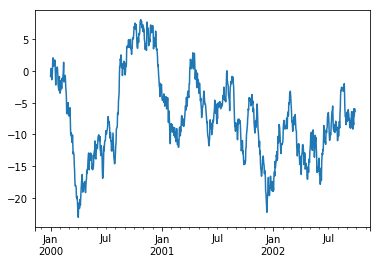

In [17]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [21]:
pruningData = pd.DataFrame(columns=['Number of Leaf Nodes',
                                    'Training Accuracy',
                                    'Validation Accuracy',
                                    'Test Accuracy'])
pruningData.describe()
pruningData.append([10, .99, .98, .94])

/home/jeb/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,Number of Leaf Nodes,Training Accuracy,Validation Accuracy,Test Accuracy,0
0,NaN,NaN,NaN,NaN,10.00
1,NaN,NaN,NaN,NaN,0.99
2,NaN,NaN,NaN,NaN,0.98
3,NaN,NaN,NaN,NaN,0.94


In [32]:
list=[['a','b']]
list.append(['e','f'])
df=pd.DataFrame(list,columns=['col1','col2'])
df.head()

,col1,col2
0,a,b
1,e,f


In [33]:
df = pd.DataFrame(columns=['a', 'b'])
df

,a,b


In [68]:
a = np.ones((10))
b = np.zeros((10))
df = pd.DataFrame({'a':a, 'b':b})
print(a)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
